In [1]:
%matplotlib inline
import pandas as pd
import pandasql
import csv
import datetime
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ggplot import *
import scipy
import scipy.stats
import math

In [3]:
# This code is to read the csv file using Pandas

weather_data = pd.read_csv('/Users/TonyRodriguez1/Dropbox/Udacity/DataAnalyst/P2 Analyzing the NYC Subway Dataset/improved-dataset/turnstile_weather_v2.csv')
weather_data

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0,0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0,0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0,0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0,0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0,0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
5,R003,05-02-11,00:00:00,4388348,2911036,15,34,2011-05-02 00:00:00,0,0,...,30.31,0,50.0,6.9,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177
6,R003,05-02-11,04:00:00,5818689,3874767,19,40,2011-05-02 04:00:00,4,0,...,30.27,0,50.0,4.6,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177
7,R003,05-02-11,08:00:00,4388855,2911194,488,118,2011-05-02 08:00:00,8,0,...,30.30,0,53.1,10.4,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177
8,R003,05-02-11,12:00:00,4389345,2911326,490,132,2011-05-02 12:00:00,12,0,...,30.24,0,57.0,11.5,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177
9,R003,05-02-11,16:00:00,4389576,2911558,231,232,2011-05-02 16:00:00,16,0,...,30.16,0,59.0,11.5,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177


In [24]:
# I used this code to get a list of all columns in my dataframe

weather_data.columns.values

array(['UNIT', 'DATEn', 'TIMEn', 'ENTRIESn', 'EXITSn', 'ENTRIESn_hourly',
       'EXITSn_hourly', 'datetime', 'hour', 'day_week', 'weekday',
       'station', 'latitude', 'longitude', 'conds', 'fog', 'precipi',
       'pressurei', 'rain', 'tempi', 'wspdi', 'meanprecipi',
       'meanpressurei', 'meantempi', 'meanwspdi', 'weather_lat',
       'weather_lon'], dtype=object)

In [10]:
# P2: Question 1
# This SQL query displays columns 'rain' and a count of column the amount of columns where 'rain' is equal to 1. 

q = """
    SELECT rain, COUNT(rain)
    FROM weather_data
    WHERE rain = 1;
    """
rainy_days = pandasql.sqldf(q.lower(), locals())
rainy_days

,rain,count(rain)
0,1,9585


In [11]:
# P2: Question 2
# This SQL query displays column 'fog' and the max temperature if there was not fog (0) and if there was fog (1)

q1 = """
    SELECT fog, MAX(tempi)
    FROM weather_data
    GROUP BY fog;
    """
foggy_days = pandasql.sqldf(q1.lower(), locals())
foggy_days

,fog,max(tempi)
0,0,86.0
1,1,62.6


In [12]:
# P2: Question 3
# This SQL query displays the average temperature on either Saturday (5) or Sunday (6); the average temperature 
# on weekends. 

q3 = """
    SELECT avg(meantempi)
    FROM weather_data
    WHERE day_week = 5
    OR day_week = 6;
    """
mean_temp_weekends = pandasql.sqldf(q3.lower(), locals())
mean_temp_weekends

,avg(meantempi)
0,63.264119


In [13]:
# P2: Question 4
# This SQL query displays the average temperature, grouped by days of the week, where temperature is greater than 55
# and it there was rain

q = """
    SELECT day_week,rain, avg(tempi)
    FROM weather_data
    WHERE rain = 1
    AND tempi > 55
    GROUP BY day_week;
    """
avg_min_temp_rainy = pandasql.sqldf(q.lower(), locals())
avg_min_temp_rainy

,day_week,rain,avg(tempi)
0,0,1,60.674539
1,1,1,57.531698
2,2,1,60.139546
3,3,1,64.930881
4,4,1,60.342710
5,5,1,59.359940
6,6,1,61.650554


In [26]:
# P2: Question 5 Part 1
# This python code opens turnstile_110507.txt as a csv and prints out the first few rows to see what information 
# I'm working with. I used 'with open' so that the file automatically closes after I finish. 

with open('/Users/TonyRodriguez1/Dropbox/Udacity/DataAnalyst/Project 2 NYC Subway/turnstile_110507.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
            print (row[0], row[1], row[2])
        

('A002', 'R051', '02-00-00')
('A002', 'R051', '02-00-00')
('A002', 'R051', '02-00-00')
('A002', 'R051', '02-00-00')
('A002', 'R051', '02-00-00')
('A002', 'R051', '02-00-00')
('A002', 'R051', '02-00-01')
('A002', 'R051', '02-00-01')
('A002', 'R051', '02-00-01')
('A002', 'R051', '02-00-01')
('A002', 'R051', '02-00-01')
('A002', 'R051', '02-00-01')
('A002', 'R051', '02-03-00')
('A002', 'R051', '02-03-00')
('A002', 'R051', '02-03-00')
('A002', 'R051', '02-03-00')
('A002', 'R051', '02-03-00')
('A002', 'R051', '02-03-00')
('A002', 'R051', '02-03-01')
('A002', 'R051', '02-03-01')
('A002', 'R051', '02-03-01')
('A002', 'R051', '02-03-01')
('A002', 'R051', '02-03-01')
('A002', 'R051', '02-03-01')
('A002', 'R051', '02-03-02')
('A002', 'R051', '02-03-02')
('A002', 'R051', '02-03-02')
('A002', 'R051', '02-03-02')
('A002', 'R051', '02-03-02')
('A002', 'R051', '02-03-02')
('A002', 'R051', '02-03-03')
('A002', 'R051', '02-03-03')
('A002', 'R051', '02-03-03')
('A002', 'R051', '02-03-03')
('A002', 'R051

In [17]:
# P2: Question 5 Part 2
# This code designates the read file and the write file. The for loop iterates through each row in 'read_file'
# and prepends 3 constand columns, which is the specific turnstile information for all the data. It then adds
# columns for the range (start_index, end_index) and moves 5 columns for every iteration, thereby picking up all
# the data in the text file. It writes it to a new updated turnstile txt file. 

file_in = open('/Users/TonyRodriguez1/Dropbox/Udacity/DataAnalyst/P2 Analyzing the NYC Subway Dataset/turnstile_110507.txt')
file_out = open('/Users/TonyRodriguez1/Dropbox/Udacity/DataAnalyst/P2 Analyzing the NYC Subway Dataset/updated_' + 'turnstile_110507.txt', 'wb')
read_file = csv.reader(file_in, delimiter =',')
writer_out = csv.writer(file_out, delimiter =',', lineterminator='\n')

for row in read_file:
    const_col1 = row[0]
    const_col2 = row[1]
    const_col3 = row[2]
    list_size = len(row)
    start_index=3
    end_index=list_size
    for records in range(start_index, end_index, 5):
        out_line = [const_col1, const_col2, const_col3, row[records], row[records+1], row[records+2], row[records+3], row[records+4] ]
        writer_out.writerow(out_line)

In [18]:
# P2: Question 6 Part 1
# This python code gives column names to column of data

filenames = ['/Users/TonyRodriguez1/Dropbox/Udacity/DataAnalyst/P2 Analyzing the NYC Subway Dataset/updated_turnstile_110507.txt']

with open('/Users/TonyRodriguez1/Dropbox/Udacity/DataAnalyst/P2 Analyzing the NYC Subway Dataset/master_data.txt', 'w') as outfile:
    outfile.write('C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn\n')
    for fname in filenames:
        with open(fname) as infile:
            outfile.write(infile.read())

In [19]:
# P2: Question 6 Part 2
# This code looks at my data to verify it came out how I wanted

turnstile_data = pd.read_csv('/Users/TonyRodriguez1/Dropbox/Udacity/DataAnalyst/P2 Analyzing the NYC Subway Dataset/master_data.txt')
turnstile_data

,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
0,A002,R051,02-00-00,04-30-11,00:00:00,REGULAR,3143506,1087907
1,A002,R051,02-00-00,04-30-11,04:00:00,REGULAR,3143547,1087915
2,A002,R051,02-00-00,04-30-11,08:00:00,REGULAR,3143563,1087935
3,A002,R051,02-00-00,04-30-11,12:00:00,REGULAR,3143646,1088024
4,A002,R051,02-00-00,04-30-11,16:00:00,REGULAR,3143865,1088083
5,A002,R051,02-00-00,04-30-11,20:00:00,REGULAR,3144181,1088132
6,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
7,A002,R051,02-00-00,05-01-11,04:00:00,REGULAR,3144335,1088159
8,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
9,A002,R051,02-00-00,05-01-11,12:00:00,REGULAR,3144424,1088231


In [20]:
# P2: Question 7
# This code filters out any data where DESCn does not equal 'REGULAR'

turnstile_data = turnstile_data[turnstile_data.DESCn=='REGULAR']
turnstile_data

,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
0,A002,R051,02-00-00,04-30-11,00:00:00,REGULAR,3143506,1087907
1,A002,R051,02-00-00,04-30-11,04:00:00,REGULAR,3143547,1087915
2,A002,R051,02-00-00,04-30-11,08:00:00,REGULAR,3143563,1087935
3,A002,R051,02-00-00,04-30-11,12:00:00,REGULAR,3143646,1088024
4,A002,R051,02-00-00,04-30-11,16:00:00,REGULAR,3143865,1088083
5,A002,R051,02-00-00,04-30-11,20:00:00,REGULAR,3144181,1088132
6,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
7,A002,R051,02-00-00,05-01-11,04:00:00,REGULAR,3144335,1088159
8,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
9,A002,R051,02-00-00,05-01-11,12:00:00,REGULAR,3144424,1088231


In [21]:
# P2: Question 8 & 9
# This code adds two columns which show the difference between ENTRIESn of the current row and of the previous row
# It also replaces any 'NaN' values with a 1 or a 0

turnstile_data['ENTRIESn_hourly'] = turnstile_data['ENTRIESn'] - turnstile_data['ENTRIESn'].shift(1)
turnstile_data.fillna(1, inplace=True)
turnstile_data['EXITSn_hourly'] = turnstile_data['EXITSn'] - turnstile_data['EXITSn'].shift(1)
turnstile_data.fillna(0, inplace=True)
turnstile_data

/Applications/Anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/Anaconda/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2532: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/Applications/Anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly
0,A002,R051,02-00-00,04-30-11,00:00:00,REGULAR,3143506,1087907,1,0
1,A002,R051,02-00-00,04-30-11,04:00:00,REGULAR,3143547,1087915,41,8
2,A002,R051,02-00-00,04-30-11,08:00:00,REGULAR,3143563,1087935,16,20
3,A002,R051,02-00-00,04-30-11,12:00:00,REGULAR,3143646,1088024,83,89
4,A002,R051,02-00-00,04-30-11,16:00:00,REGULAR,3143865,1088083,219,59
5,A002,R051,02-00-00,04-30-11,20:00:00,REGULAR,3144181,1088132,316,49
6,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151,131,19
7,A002,R051,02-00-00,05-01-11,04:00:00,REGULAR,3144335,1088159,23,8
8,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177,18,18
9,A002,R051,02-00-00,05-01-11,12:00:00,REGULAR,3144424,1088231,71,54


In [22]:
# P2: Question 10
# This function returns the hour as an integer

def get_hour(row):    
    return int(turnstile_data['TIMEn'][row][1])
get_hour(1) 

4

In [23]:
# P2: Question 11
# This function returns the data in the proper format

def get_format_time(row):
    date = turnstile_data['DATEn'][row]
    formatted_date = datetime.datetime.strptime(date, '%m-%d-%y')
    new_date = formatted_date.strftime('%Y-%m-%d')
    return new_date

get_format_time(1)

'2011-04-30'

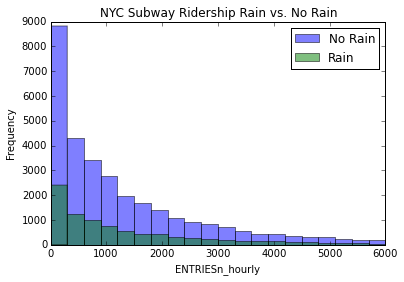

In [65]:
# P3: Question 1
# Using matplotlib I created two histograms showing the amount of hourly entries into the subway when it was raining
# and when it was not raining.

plt.figure()
weather_data['ENTRIESn_hourly'][weather_data['rain']==0].plot(kind='hist', bins=20, range=(0,6000), alpha=0.5, label='No Rain')
weather_data['ENTRIESn_hourly'][weather_data['rain']==1].plot(kind='hist', bins=20, range=(0,6000), alpha=0.5, label='Rain')
plt.xlabel('ENTRIESn_hourly')
plt.ylabel('Frequency')
plt.title('NYC Subway Ridership Rain vs. No Rain')
plt.legend()
plt.show()

In [34]:
# P3: Question 2
# The above distributions for Rain and No Rain are not normally distributed, so we cannot use Welch's t-Test because
# it assumes both samples will be approximately normally distributed. 

In [8]:
# P3: Questions 3 & 4
# Mann-Whitney U test, aka Wilcoxon rank sum test, is a non-parametric test that can be used when the distribution of
# the data appears to be non-normal. Non-parametric tests make no assumption of the probability distribution of the data. 
#
# H0: P ( x > y) = 0.5
# Ha: P ( x > y) != 0.5
#
# Alpha= 0.05
#
# With a p-value of 5.4821391424874991e-06, I reject the null at the 5% significance level and can 
# assume that the distributions of the populations are not equal.

rain = weather_data['ENTRIESn_hourly'][weather_data['rain']==1]
no_rain = weather_data['ENTRIESn_hourly'][weather_data['rain']==0]
rain_mean = np.mean(rain)
no_rain_mean = np.mean(no_rain)
U, p = scipy.stats.mannwhitneyu(rain, no_rain)
rain_mean, no_rain_mean, U, p*2

(2028.1960354720918, 1845.5394386644084, 153635120.5, 5.4821391424874991e-06)

In [66]:
# P3: Questions 5, 6, 7, 8 
# Using OLS regression, I regressed 'UNIT' as dummy variables, 'hour', 'meantempi', 'weekday', 'precipi'
# predictor variables against my dependent variable (y) 'ENTRIESn_hourly'. The R^2 value of 0.483 means that 
# 48.3% of the variability in ENTRIESn_hourly can be explained by the variables in my regression model. 

def linear_regression(features, values):
    features = sm.add_constant(features)
    model = sm.OLS(values, features)
    results = model.fit()
    print results.summary()
    intercept = results.params[0]
    params = results.params[1:]    
    return intercept, params


def predictions(dataframe):
    features = weather_data[[ 'hour', 'meantempi', 'weekday', 'precipi', 'rain']]  
    dummy_units = pd.get_dummies(weather_data['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    values = weather_data['ENTRIESn_hourly']
    intercept, params = linear_regression(features, values)
    predictions = intercept + np.dot(features, params)
    return(predictions)
    
print predictions(weather_data)

                            OLS Regression Results                            
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     162.5
Date:                Thu, 10 Sep 2015   Prob (F-statistic):               0.00
Time:                        23:08:25   Log-Likelihood:            -3.8722e+05
No. Observations:               42649   AIC:                         7.749e+05
Df Residuals:                   42404   BIC:                         7.771e+05
Df Model:                         244                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        826.5184    103.515      7.985      0.0

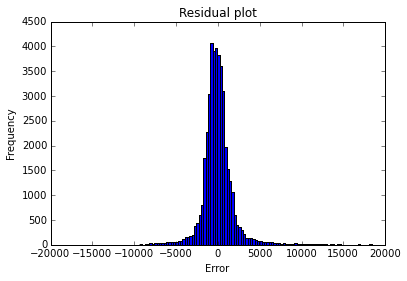

count    4.264900e+04
mean    -1.165813e-09
std      2.122564e+03
min     -9.292994e+03
25%     -9.201186e+02
50%     -1.711046e+02
75%      6.357076e+02
max      2.423559e+04
dtype: float64

In [15]:
features = weather_data[['precipi', 'hour', 'meantempi','weekday']]
dummy_units = pd.get_dummies(weather_data['UNIT'], prefix='unit')
features = features.join(dummy_units)
features = sm.add_constant(features)
values = weather_data['ENTRIESn_hourly']
model = sm.OLS(values, features)
results = model.fit()

plt.figure()
data = results.resid
data.plot(kind='hist', bins=120)
plt.ylim((0,4500))
plt.xlim((-20000,20000))
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Residual plot')
plt.show()
data.describe()

In [42]:
# P4: Question 1 Part 1
# Before I plotted by data using ggplot, I queried the dataset to extract specific data to plot
# This subset of data shows the sum of entries into the subway by day

q = """
SELECT day_week, sum(ENTRIESn_hourly)
FROM weather_data
GROUP BY day_week;
"""
results_q = pandasql.sqldf(q.lower(), locals())
results_q

,day_week,sum(entriesn_hourly)
0,0,12795107
1,1,15246943
2,2,12592691
3,3,12709142
4,4,12411679
5,5,7486907
6,6,7218706


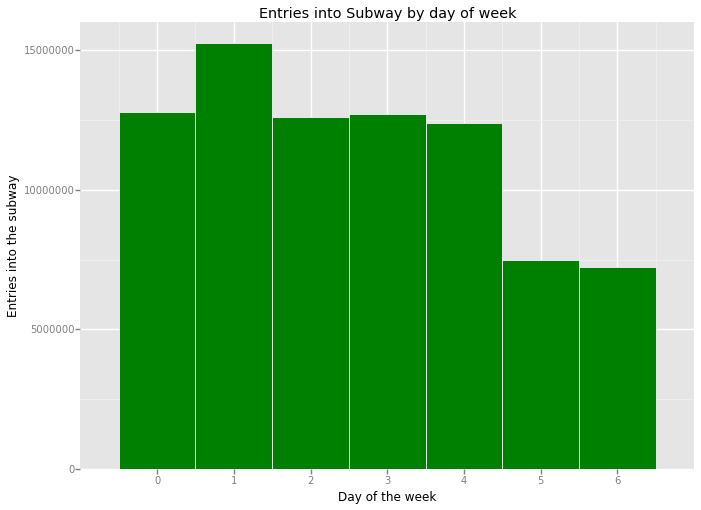

<ggplot: (281596397)>


In [44]:
# P4: Question 1 Part 2
# I plotted a histogram using ggplot to show the amount of entries by day of the week. 0 being Monday, 6 being Sunday.
# There is clearly an increase in subway ridership on weekdays, with a sharp drop off on weekends.

print ggplot(results_q,aes('day_week', 'sum(entriesn_hourly)'))+geom_bar(stat='bar', fill="green")\
+scale_x_continuous(breaks=(0,1,2,3,4,5,6), limits=(-1,7))+xlab('Day of the week')+ylab('Entries into the subway')\
+ylim(0,16000000)+ggtitle('Entries into Subway by day of week')

In [45]:
# P4: Question 1 Part 3
# This query pulls the date and sums up the hourly entries by date. 

q1 = """
SELECT DATEn, sum(ENTRIESn_hourly)
FROM weather_data
GROUP BY DATEn;
"""
results_q1 = pandasql.sqldf(q1.lower(), locals())
results_q1

,DATEn,sum(entriesn_hourly)
0,05-01-11,1563693
1,05-02-11,2806944
2,05-03-11,3183128
3,05-04-11,3118915
4,05-05-11,3199002
5,05-06-11,3179032
6,05-07-11,1877545
7,05-08-11,1400098
8,05-09-11,2834785
9,05-10-11,3090088


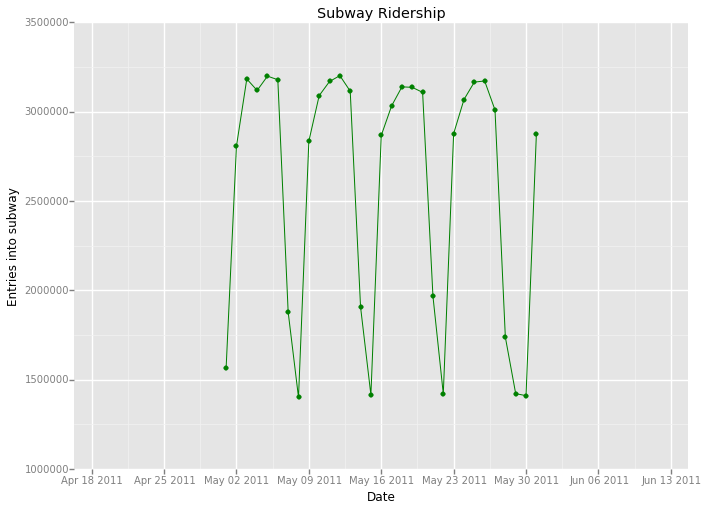

<ggplot: (277457781)>


In [46]:
# P4: Question 1 Part 2
# I used ggplot to plot the time series of Subway Ridership during May of 2011. You can clearly see subway ridership 
# increases on weekdays and drops off significantly on weekends, which is consistent with the histogram shown above.
# May 30, 2011 was of interest to me because I could not figure out why subway ridership dropped off on a Monday. 
# After doing a quick google search, I found out that May 30, 2011 was Memorial Day, and it stands to reason that 
# subway ridership would be down. I did have trouble truncating the x axis ticks using ggplot. 

pd.options.mode.chained_assignment = None
print ggplot(results_q1, aes(pd.to_datetime(results_q1['DATEn']), 'sum(entriesn_hourly)'))+geom_point(color='green')\
+geom_line(color='green')+xlab('Date')+ylab('Entries into subway')+ggtitle('Subway Ridership')

In [62]:
# P4: Question 2 Part 1
# This query pulls the weather conditions, sum of hourly entries, and temperature for my next plot. 

q2 = """
SELECT conds, sum(ENTRIESn_hourly), round(avg(tempi),0)
FROM weather_data
GROUP BY conds;
"""
results_q2 = pandasql.sqldf(q2.lower(), locals())
results_q2

,conds,sum(entriesn_hourly),"round(avg(tempi),0)"
0,Clear,28827722,66
1,Fog,43983,62
2,Haze,3188847,72
3,Heavy Rain,503799,60
4,Light Drizzle,469468,56
5,Light Rain,4247129,57
6,Mist,4268,65
7,Mostly Cloudy,9777422,65
8,Overcast,22665202,59
9,Partly Cloudy,3297004,67


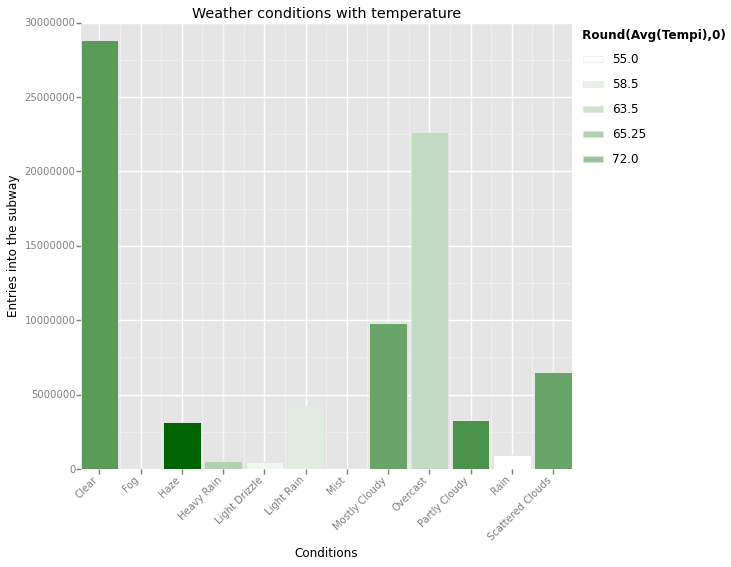

<ggplot: (279401237)>


In [63]:
# P4: Question 2 Part 2
# This plot shows hourly entries into the subway on the y axis, weather conditions on the x axis, and uses colour 
# scaling to show the average temperature in the fill of the bars. As expected, days with rain and overcast were the
# coldest, and days where the weather was clear, it was hotter. I could not figure out how to change the legend 
# title. I think that using scale_color_manual may do the trick, but the documentation on the yhat website was not 
# working. Other than that, I was impressed  with how much functionality ggplot gives you to customize the 
# visualization.

print ggplot(results_q2,aes('conds', 'sum(entriesn_hourly)',fill='round(avg(tempi),0)'))+geom_bar(stat='bar')\
+xlab('Conditions')+ylab('Entries into the subway')+ylim(0,30000000)+ggtitle('Weather conditions with temperature')\
+theme(axis_text_x = element_text(angle = 45, hjust = 1))+scale_colour_gradient2(low='white', high='darkgreen')